In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px


In [2]:
df = pd.read_csv("//content/drive/MyDrive/Churn_Modelling.csv")


In [3]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df.drop("CustomerId", axis=1, inplace=True)
df.head(2)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [8]:
df.drop(columns=['RowNumber','Surname'], axis=1, inplace=True)
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


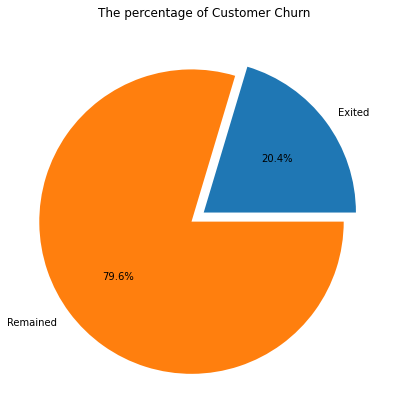

In [9]:
plt.figure(figsize=(7,7))
plt.title("The percentage of Customer Churn")
plt.pie([(df['Exited']==1).sum(),(df['Exited']==0).sum()], explode=(0,0.1), autopct='%1.1f%%',
        labels=('Exited','Remained'))
plt.show()

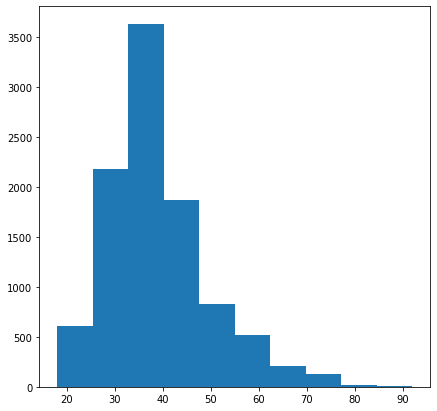

In [10]:
plt.figure(figsize=(7,7))
plt.hist(x=df['Age'], bins=10)
plt.show()

In [11]:
df.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

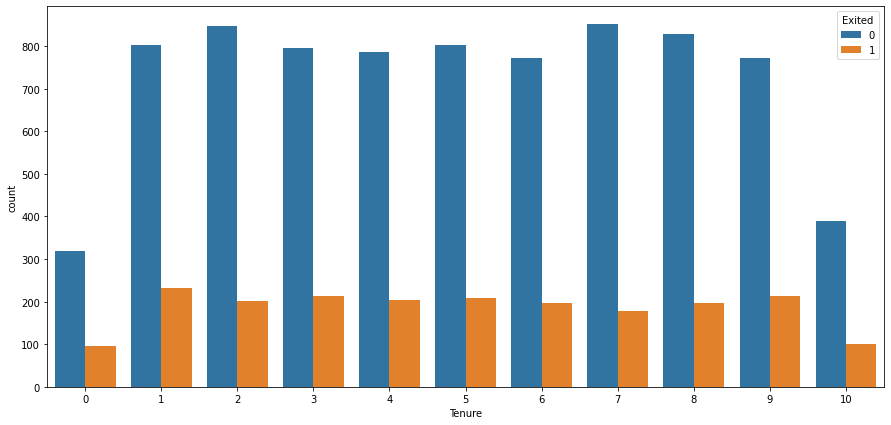

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Tenure'], hue=df['Exited'])

In [13]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

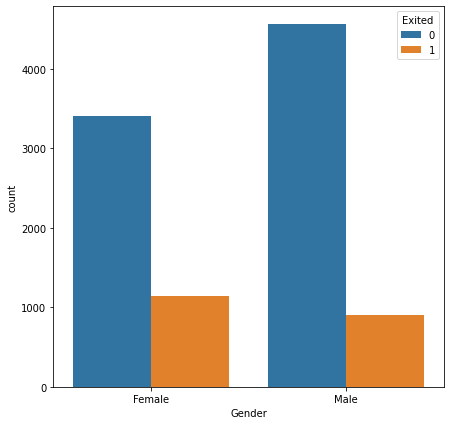

In [14]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['Gender'], hue=df['Exited'])

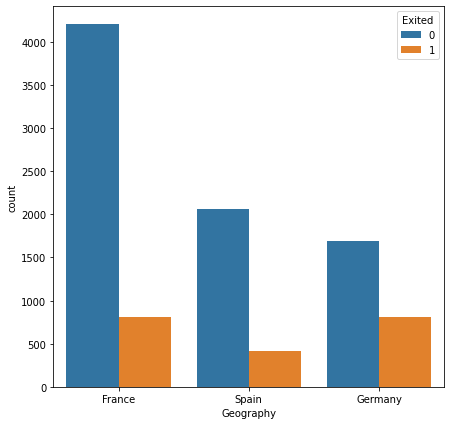

In [15]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['Geography'],hue=df['Exited'])

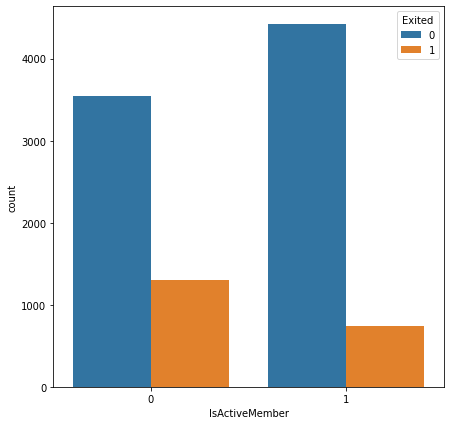

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['IsActiveMember'], hue=df['Exited'])

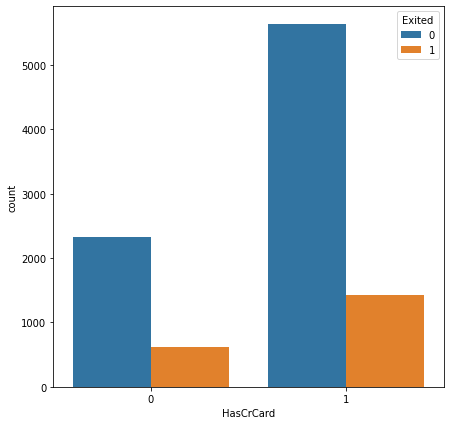

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['HasCrCard'], hue=df['Exited'])

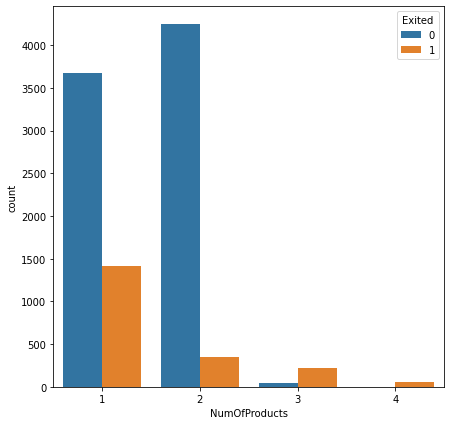

In [18]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['NumOfProducts'], hue=df['Exited'])

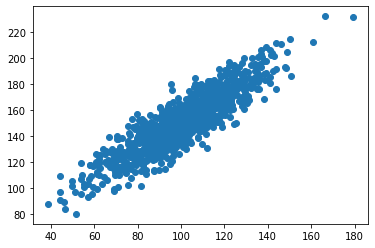

In [19]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
seed(1)
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
pyplot.scatter(x, y)
pyplot.show()


Text(0.5, 1.0, 'Boxplot, Churn posibilities (+blends)')

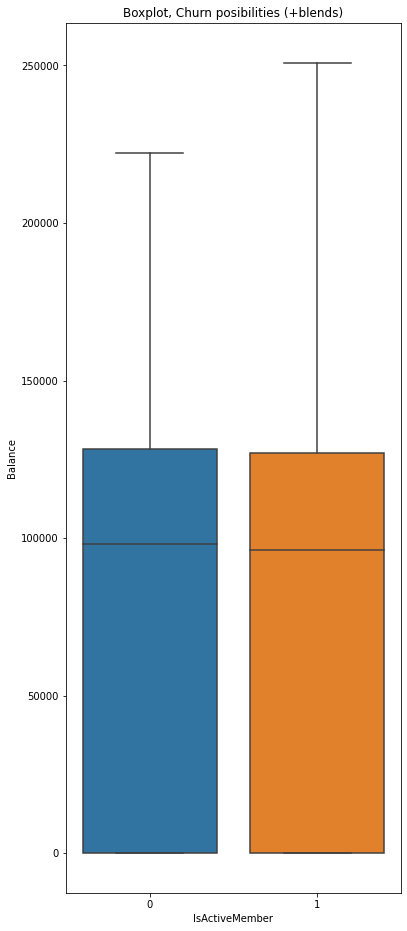

In [20]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='Balance',
    x='IsActiveMember'
)
ax.set_title('Boxplot, Churn posibilities (+blends)')

Text(0.5, 1.0, 'Boxplot, Churn posibilities (+blends)')

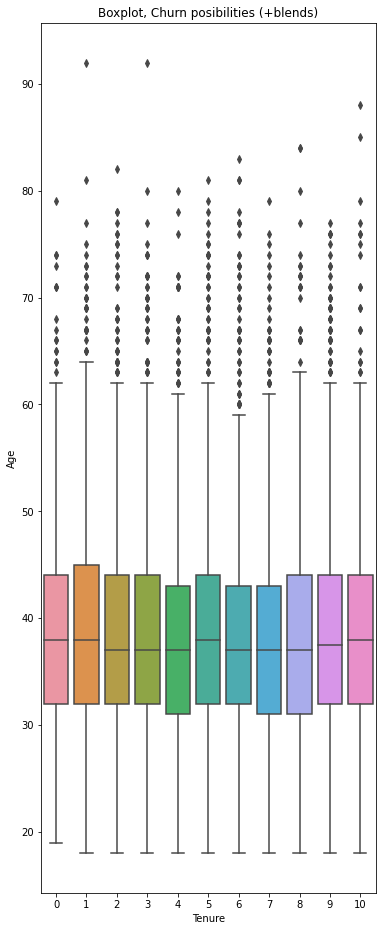

In [21]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='Age',
    x='Tenure'
)
ax.set_title('Boxplot, Churn posibilities (+blends)')

Text(0.5, 1.0, 'Boxplot, Churn posibilities (+blends)')

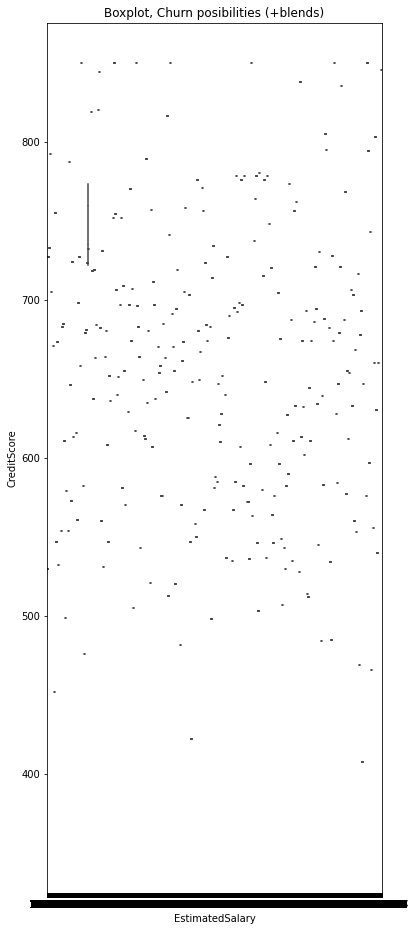

In [22]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=df,
    y='CreditScore',
    x='EstimatedSalary'
)
ax.set_title('Boxplot, Churn posibilities (+blends)')

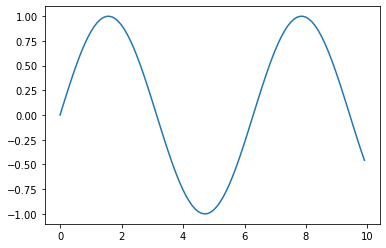

In [23]:
from numpy import sin
from matplotlib import pyplot
x = [x*0.1 for x in range(100)]
y = sin(x)
pyplot.plot(x, y)
pyplot.show()

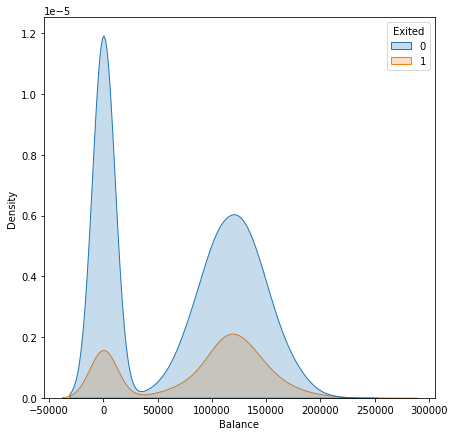

In [24]:
plt.figure(figsize=(7,7))
sns.kdeplot(x=df['Balance'], hue=df['Exited'], legend=True, shade=True)

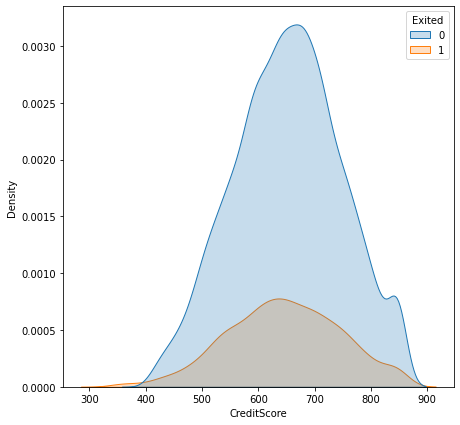

In [25]:
plt.figure(figsize=(7,7))
sns.kdeplot(x=df['CreditScore'], hue=df['Exited'], legend=True, shade=True)

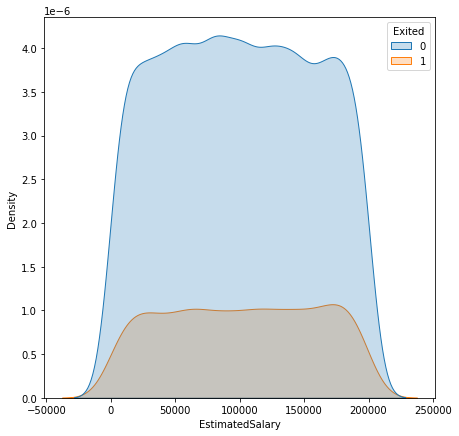

In [26]:
plt.figure(figsize=(7,7))
sns.kdeplot(x=df['EstimatedSalary'], hue=df['Exited'], legend=True, shade=True)

In [27]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [28]:
def latent_space(model, train_set, it=''):
    x_latent = model.enc(train_set.data.float())
    plt.figure(figsize=(10, 7))
    plt.scatter(x_latent[0][:,0].detach().numpy(), 
                x_latent[1][:,1].detach().numpy(), 
                c=train_set.targets)
    plt.colorbar()
    plt.title("VAE Latent Space", fontsize=20)
    plt.xlabel("X", fontsize=18)
    plt.ylabel("Y", fontsize=18)
    plt.savefig('VAE_space'+str(it)+'.png', format='png', dpi=200)

In [29]:
plt.show()

In [30]:
Geography = pd.get_dummies(df['Geography'], drop_first=True)
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [31]:
df.drop(['Geography','Gender'], axis=1, inplace=True)

In [32]:
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0


In [33]:
df = pd.concat([df,Geography,Gender],axis=1)
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


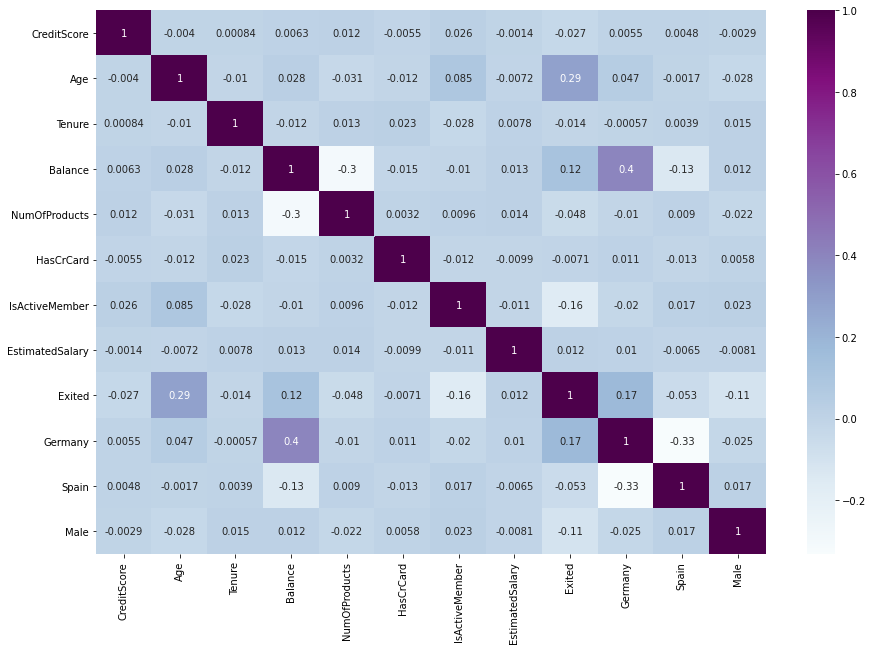

In [34]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [35]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [36]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0


In [37]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [39]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(11, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics='accuracy')

In [44]:
trained_model = model.fit(X_train, y_train , batch_size=100, epochs = 50)

Epoch 1/50
80/80 [==============================] - 1s 1ms/step - loss: 0.6831 - accuracy: 0.5812
Epoch 2/50
80/80 [==============================] - 0s 998us/step - loss: 0.5628 - accuracy: 0.7930
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7987
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.7985
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8010
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8041
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7997
Epoch 8/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8008
Epoch 9/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.7961
Epoch 10/50
80/80 [==============================] - 0s 999us/step - loss: 0.4155 - accuracy: 0.8101
Epoch 11/50
80/

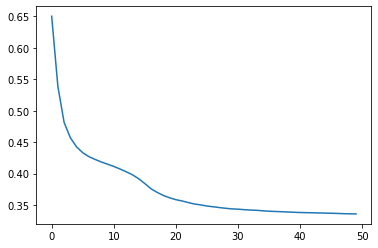

In [45]:
plt.plot(trained_model.history["loss"])

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred = np.where(y_pred >= 0.5,1,0)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1585
           1       0.77      0.47      0.58       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

